<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/05_01_cnn_modern_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***실습 5-1 : Modern CNN***

## ***Import Module***

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import Model

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.0.0


In [0]:
# reset of notebook state
tf.keras.backend.clear_session() 

## ***DataSet***

### *Load*

In [0]:
#data_set = tf.keras.datasets.mnist
#data_set = tf.keras.datasets.fashion_mnist
data_set = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = data_set.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### *Preprocessing*

In [0]:
# Add a channels dimension for MNIST dataset: (28,28)
#x_train = x_train[..., tf.newaxis]
#x_test = x_test[..., tf.newaxis]

# Converts class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

## ***Model***

### *Define*

### Model_A define: Dropout 사용 model

In [0]:
def model_cnn_basic():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  
  # Dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_basic = model_cnn_basic()

model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
def model_cnn_dropout():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(Dropout(rate=0.2))                          #  DO1
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Dropout(rate=0.2))                          # DO2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(Dropout(rate=0.2))                           # DO3
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  
  # dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_DO = model_cnn_dropout()

model_DO.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

### Model_B define: Batch Normalization 사용 model

In [0]:
def model_cnn_batchnormal():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3))) 
  model.add(BatchNormalization())             # BN1
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())             # BN2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu')) 
  model.add(BatchNormalization())             # BN3
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  
  # dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_BN=model_cnn_batchnormal()

model_BN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)        

In [0]:
def model_cnn_batchnormal_do():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3))) 
  model.add(BatchNormalization())             # BN1
  model.add(Dropout(rate=0.2))                # DO1
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())             # BN2
  model.add(Dropout(rate=0.2))                # DO2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu')) 
  model.add(BatchNormalization())             # BN3
  model.add(Dropout(rate=0.2))                # DO2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  
  # dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_BN_DO=model_cnn_batchnormal_do()

model_BN_DO.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)      

### *Compile*

In [0]:
model_basic.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
model_DO.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
model_BN.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
model_BN_DO.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

### *Fit*

Epoch 20/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0276 - accuracy: 0.9911
CPU times: user 1min 7s, sys: 30.2 s, total: 1min 38s   
Wall time: 1min 40
(@Notebook Setting/GPU)

In [0]:
batch_n = 512
epoch_n = 30

In [0]:
%%time
history_basic = model_basic.fit(x_train, y_train, 
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 241us/sample - loss: 1.6221 - acc: 0.4128 - val_loss: 1.3615 - val_acc: 0.5033
Epoch 2/30
50000/50000 [==============================] - 9s 174us/sample - loss: 1.1830 - acc: 0.5817 - val_loss: 1.0762 - val_acc: 0.6182
Epoch 3/30
50000/50000 [==============================] - 9s 172us/sample - loss: 0.9588 - acc: 0.6659 - val_loss: 0.9649 - val_acc: 0.6587
Epoch 4/30
50000/50000 [==============================] - 9s 171us/sample - loss: 0.8297 - acc: 0.7131 - val_loss: 0.8137 - val_acc: 0.7173
Epoch 5/30
50000/50000 [==============================] - 9s 172us/sample - loss: 0.7207 - acc: 0.7501 - val_loss: 0.8211 - val_acc: 0.7098
Epoch 6/30
50000/50000 [==============================] - 9s 172us/sample - loss: 0.6401 - acc: 0.7788 - val_loss: 0.7426 - val_acc: 0.7438
Epoch 7/30
50000/50000 [==============================] - 9s 173us/sample - loss: 0.5590 - acc: 0.8066 - val_

In [0]:
%%time
history_DO = model_DO.fit(x_train, y_train, 
                        shuffle=True,
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        #validation_split=0.2
                        validation_data=(x_test, y_test)
                        )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 324us/sample - loss: 1.8101 - acc: 0.3420 - val_loss: 1.4915 - val_acc: 0.4911
Epoch 2/30
50000/50000 [==============================] - 15s 291us/sample - loss: 1.2820 - acc: 0.5391 - val_loss: 1.3100 - val_acc: 0.5716
Epoch 3/30
50000/50000 [==============================] - 15s 291us/sample - loss: 1.0428 - acc: 0.6318 - val_loss: 1.1459 - val_acc: 0.6159
Epoch 4/30
50000/50000 [==============================] - 15s 292us/sample - loss: 0.8820 - acc: 0.6920 - val_loss: 0.9601 - val_acc: 0.6885
Epoch 5/30
50000/50000 [==============================] - 15s 291us/sample - loss: 0.7823 - acc: 0.7249 - val_loss: 0.8968 - val_acc: 0.7031
Epoch 6/30
50000/50000 [==============================] - 15s 293us/sample - loss: 0.6723 - acc: 0.7641 - val_loss: 0.8453 - val_acc: 0.7262
Epoch 7/30
50000/50000 [==============================] - 15s 291us/sample - loss: 0.6004 - acc: 0.7898 

In [0]:
%%time
history_BN = model_BN.fit(x_train, y_train, 
                        shuffle=True,
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        #validation_split=0.2
                        validation_data=(x_test, y_test)
                        )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 312us/sample - loss: 2.3958 - acc: 0.4125 - val_loss: 2.8290 - val_acc: 0.1253
Epoch 2/30
50000/50000 [==============================] - 14s 274us/sample - loss: 1.1380 - acc: 0.5942 - val_loss: 3.5299 - val_acc: 0.1204
Epoch 3/30
50000/50000 [==============================] - 14s 274us/sample - loss: 0.8665 - acc: 0.6931 - val_loss: 3.6130 - val_acc: 0.1619
Epoch 4/30
50000/50000 [==============================] - 14s 275us/sample - loss: 0.6570 - acc: 0.7709 - val_loss: 2.7891 - val_acc: 0.2842
Epoch 5/30
50000/50000 [==============================] - 14s 275us/sample - loss: 0.4874 - acc: 0.8305 - val_loss: 1.4126 - val_acc: 0.5390
Epoch 6/30
50000/50000 [==============================] - 14s 275us/sample - loss: 0.3303 - acc: 0.8900 - val_loss: 1.0384 - val_acc: 0.6660
Epoch 7/30
50000/50000 [==============================] - 14s 275us/sample - loss: 0.2024 - acc: 0.9351 

Epoch 20/20
60000/60000 [==============================] - 4s 73us/sample - loss: 2.1958e-04 - accuracy: 1.0000
CPU times: user 1min 1s, sys: 25.2 s, total: 1min 26s   
Wall time: 1min 27s (@Notebook Setting/GPU)

In [0]:
%%time
history_BN_DO = model_BN_DO.fit(x_train, y_train, 
                        shuffle=True,
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        #validation_split=0.2
                        validation_data=(x_test, y_test)
                        )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 351us/sample - loss: 2.7399 - acc: 0.3752 - val_loss: 4.2712 - val_acc: 0.1002
Epoch 2/30
50000/50000 [==============================] - 16s 322us/sample - loss: 1.2392 - acc: 0.5587 - val_loss: 6.0778 - val_acc: 0.1001
Epoch 3/30
50000/50000 [==============================] - 16s 322us/sample - loss: 0.9886 - acc: 0.6499 - val_loss: 8.5046 - val_acc: 0.1006
Epoch 4/30
50000/50000 [==============================] - 16s 323us/sample - loss: 0.7976 - acc: 0.7213 - val_loss: 8.7629 - val_acc: 0.1138
Epoch 5/30
50000/50000 [==============================] - 16s 324us/sample - loss: 0.6544 - acc: 0.7714 - val_loss: 4.9014 - val_acc: 0.2485
Epoch 6/30
50000/50000 [==============================] - 16s 324us/sample - loss: 0.5355 - acc: 0.8127 - val_loss: 2.2185 - val_acc: 0.4883
Epoch 7/30
50000/50000 [==============================] - 16s 325us/sample - loss: 0.4392 - acc: 0.8481 

## ***Analysis***

In [0]:
import numpy as np

print(np.max(history_basic.history['val_acc']))
print(np.max(history_DO.history['val_acc']))
print(np.max(history_BN.history['val_acc']))
print(np.max(history_BN_DO.history['val_acc']))

0.777
0.7764
0.8006
0.7764


### *Plot*

In [0]:
history_basic.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

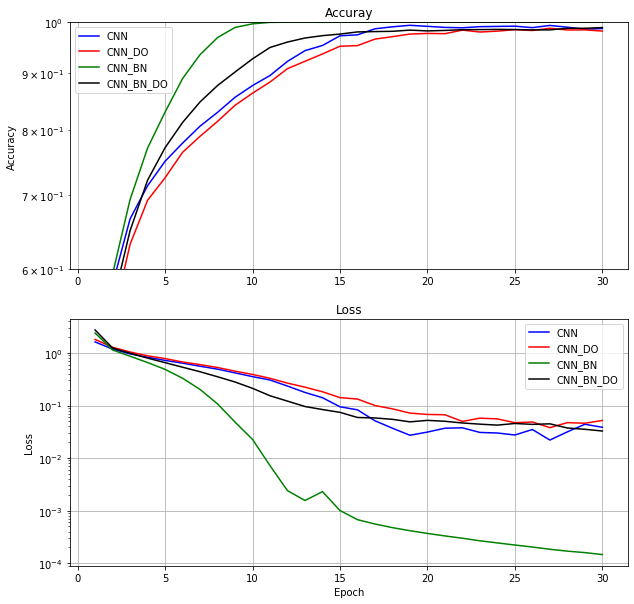

In [0]:
loss = history_basic.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.semilogy(epochs, history_basic.history['acc'], 'b', label='CNN')
plt.semilogy(epochs, history_DO.history['acc'], 'r', label='CNN_DO')
plt.semilogy(epochs, history_BN.history['acc'], 'g', label='CNN_BN')
plt.semilogy(epochs, history_BN_DO.history['acc'], 'black', label='CNN_BN_DO')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.semilogy(epochs, history_basic.history['loss'], 'b', label='CNN')
plt.semilogy(epochs, history_DO.history['loss'], 'r', label='CNN_DO')
plt.semilogy(epochs, history_BN.history['loss'], 'g', label='CNN_BN')
plt.semilogy(epochs, history_BN_DO.history['loss'], 'black', label='CNN_BN_DO')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()



## ***실습과제***

### *과제1*

- *dropout과 batch normalization 관련 실험 필요*